# Numerically Computing the Electric Field

One type of problem you will encounter in electrostatics is one where you know the distribution of charge at every point in space (or every point where the sources exist) and you need to determine the electric field everywhere in space (or everywhere you are interested). This can be done using Coulomb's law,

$$ \vec{E} = \int_V d\tau\;\dfrac{1}{4\pi\varepsilon_0}\dfrac{dq}{|\mathfrak{\vec{r}}|^2}\hat{\mathfrak{r}}$$

This calculation might be difficult to perform for all locations that you are interested in, or it might be  impossible to solve analytically as no anti-derivative might exist for the function. In this case, using numerical techniques makes the problem tractable.

## The concept of numerical integration 

Typically, when you perform an integral analytically, you are seeking the anti-derivative of the function that you are integrating. This is one productive way to think about an integral. 

Another productive way to think about integration is adding up small bits. You might think about this when you do a line integral, but this can also be a productive way of thinking about any kind of integral, in particular, numerical integration. To conceptualize a numerical integral where you are trying to determine the electric field it is important to follow these steps:

1. Divide the source into chunks ($dq$) and pick a starting chunk
2. Determine the separation vector ($\vec{\mathfrak{r}}$) between the chunk and the observation location
3. Compute the contribution to the total electric field from the chunk ($d\vec{E}$) - treating it as a point charge of size $dq$
4. Add this contribution to the "running" total of electric field
5. Repeat steps 2-5, which form the basis of numerical integration (it's the superposition of the chunks), until you have added up the contributions of all the chunks

## Purpose of this problem

In this problem, you will calculate and display the electric field of a point charge and, then, a pair of oppositely charged point charges (called a "dipole"). In a future problem, we will use what you have learned here to compute the electric field of a line charge (i.e., actually do an integral). This problem will illustrate the architecture needed to compute a display the electric field of a chunk and then a pair of chunks, which you can then use for any arbritrary number chunks.

_For this problem, we will artificially limit our calculations to two-dimensions as we are going to be graphing in a plane. It is perfectly possibly to use the same basic techniques in 3D, but we will try to keep this exercise a bit simpler._

### Import the relevant libraries

We will begin by importing numpy and matplotlib, which allow us to do vector calculations and plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Vector Math with numpy

The numpy library doesn't precisely support vector mathematics in the way you are used to doing analytically. That's because the object that is most closely related to a vector is a numpy array, which is a more general object than a vector (or a matrix). But we can develop some of the architecture that we are used to using with vectors in the context of arrays. In this section of the notebook, you will see some of the calculations that you can do, and you will be asked to do some others below. We will use this architecture to compute the electric field of a point charge and a dipole.

In [2]:
a = np.array([3,4])      # create a 'vector' called 'a' with two components
b = np.array([6,-10])    # create a 'vector' called 'b' with two components

We can do simple operations like scalar multiplication ($2\vec{a}$), addition ($\vec{a}+\vec{b}$), and subtraction ($\vec{a}-\vec{b}$) in a straight forward manner.

In [3]:
print(2*a)
print(a+b)
print(a-b)

[6 8]
[ 9 -6]
[-3 14]


More complicated vector operations either involve us using indicies like components. For example, the $x$ of $\vec{a}$ can be represented by the 0th entry in the array.

In [4]:
a_x = a[0]
print(a_x)

3


From this idea, we can do more complex operations like computing magnitudes or dot products using components.

In [5]:
mag_a = np.sqrt(a[0]**2 + a[1]**2)
print(mag_a)

a_dot_b = a[0]*b[0] + a[1]*b[1]
print(a_dot_b)

5.0
-22


This is quite cumbersome, so we can instead use some built-in functions within numpy to make these operations simpler.

In [23]:
mag_a = np.linalg.norm(a)
print(mag_a)

a_dot_b = np.dot(a,b)
print(a_dot_b)

5.0
-22


With these functions we can do most of the vector operations that we will need for computing electric fields. For example, computing the unit vector of $\vec{c} = \vec{a}-\vec{b}$ is pretty straight forward now. 

We can further check that the magnitude of $\hat{c}$ is 1 (or at least as close as the computer can get to 1 with rounding errors).

In [26]:
c = a-b
c_hat = c/np.linalg.norm(c)
print(c_hat)

mag_c_hat = np.linalg.norm(c_hat)
print(mag_c_hat)

[-0.20952909  0.97780241]
0.9999999999999999


### Computing the Electric Field of a point charge

One of the uses of these vector calculations is quickly computing and representing the electric field of a distribution of charges. We will get there next week, but for now, let's make sure we can build the electric field of a point charge.

Consider a point charge of 0.1$\mu C$ located at the origin. We want to compute and represent the electric field of the charge at a distance of $0.1 m$ from the charge along the $x$-axis. We can construct that calculation relatively easily with the vector analysis from above.

_Note: that we are still working in 2D as we will also graph this._

In [6]:
k = 9e9                           ## Electric constant in SI units
Q = 0.1e-6                        ## Charge in SI units

rSource = np.array([0,0])         ## Source Location (Charge)
rObs = np.array([0.1,0])          ## Observation Location

r = rObs - rSource                ## Separation vector; Griffth's script r

E = k*Q*r/(np.linalg.norm(r))**3  ## Computing the electric field

print(E)

[90000.     0.]


#### Drawing the electric field

This number is useful but, we would gain more insight if we could graph this. So we using ```matplotlib``` to plot the charge and an ```arrow``` to represent the electric field. We will see a problem with representing these on the same graph and fix it in a moment.

[-0.2, 0.2, -0.2, 0.2]

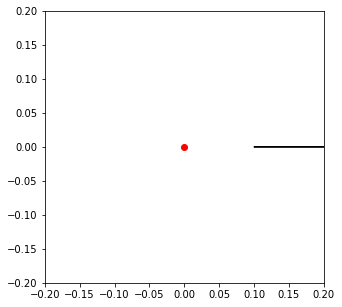

In [7]:
fig = plt.figure(figsize=(5,5))

plt.plot(0,0,'ro')
plt.arrow(rObs[0],rObs[1],E[0],E[1])

plt.axis([-.2,.2,-.2,.2])

Notice that the arrow head can't be seen. This is because we are drawing an arrow of length 90000 units on a graph that ends at 0.2 units. We need to introduce a rescaling to see the arrow. We can estimate that pretty easily and then use it.

5.555555555555556e-07


[-0.2, 0.2, -0.2, 0.2]

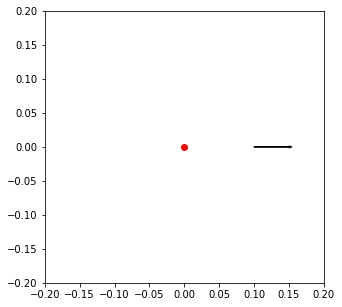

In [8]:
Escale = np.linalg.norm(r)/np.linalg.norm(E)/2      ## Make the scale 1/2 the size of the ratio of r to E
print(Escale)

fig = plt.figure(figsize=(5,5))

plt.plot(0,0,'ro')
plt.arrow(rObs[0],rObs[1],Escale*E[0],Escale*E[1])  ## Use the scale

plt.axis([-.2,.2,-.2,.2])

### Problems to solve

Now, that you have seen how to calculate the electric field using ```numpy``` and to represent it using the ```arrow``` in ```matplotlib```, you have two problems to solve. The third problem is a bonus and combines the first two problems.

1. Using the techniques demonstrated above, compute (automatically) the electric field due to the same point charge at 20 locations around the charge (0.1 m away). That is, you should display the field vector at 20 locations that encircle the charge. You will want to use a loop to do this.
2. Compute the electric field due to a dipole, two oppositely charged point charges (magnitude of the charges is still 0.1$\mu C$). Place them 0.02 m apart on the y-axis. Compute and represent (with arrows) the electric field at 4 locations: 0.1m above the origin, 0.1 m below the origin, 0.1m to the left of the origin, and 0.1m to the right of the origin.
3. Compute and represent (with arrows) the electric field of the dipole at 20 equally spaced locations around the dipole. You will want to use a loop.